In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#read the CSV file with comma delimiter
df = pd.read_csv('/content/drive/MyDrive/Praktikum_ML/praktikum06/data/glass.csv', sep=',')

#cetak header data (5 baris data) dari file
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [7]:
df['Type'].value_counts()

,count
Type,
2,76
1,70
7,29
3,17
5,13
6,9


In [8]:
X = df[['RI', 'Na', 'Mg', 'Al', 'Si','K', 'Ca', 'Ba', 'Fe']]

#kolom target (label)
y = df['Type']

In [9]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [10]:
y.head()

,Type
0,1
1,1
2,1
3,1
4,1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#Membuat model SVM dengan kernel linear
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
y_pred = model.predict(X_test)
#Akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")
#Laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))
#Matriks kebingungan
print("\nMatriks Kebingungan:\n", confusion_matrix(y_test, y_pred))

Akurasi: 74.42%

Laporan Klasifikasi:
               precision    recall  f1-score   support

           1       0.69      0.82      0.75        11
           2       0.67      0.71      0.69        14
           3       0.00      0.00      0.00         3
           5       0.80      1.00      0.89         4
           6       1.00      0.67      0.80         3
           7       0.88      0.88      0.88         8

    accuracy                           0.74        43
   macro avg       0.67      0.68      0.67        43
weighted avg       0.70      0.74      0.72        43


Matriks Kebingungan:
 [[ 9  2  0  0  0  0]
 [ 3 10  0  0  0  1]
 [ 1  2  0  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  1  2  0]
 [ 0  1  0  0  0  7]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Confusion Matrix:
 [[ 9  2  0  0  0  0]
 [ 3 10  0  0  0  1]
 [ 1  2  0  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  1  2  0]
 [ 0  1  0  0  0  7]]


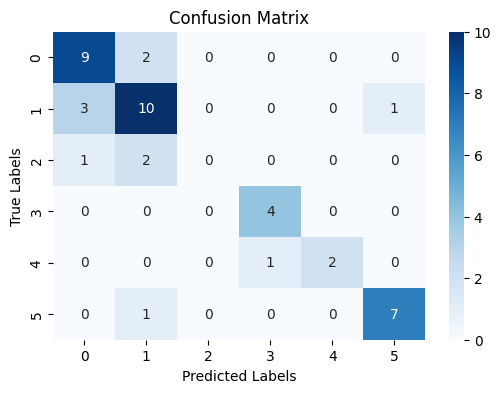

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

#buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

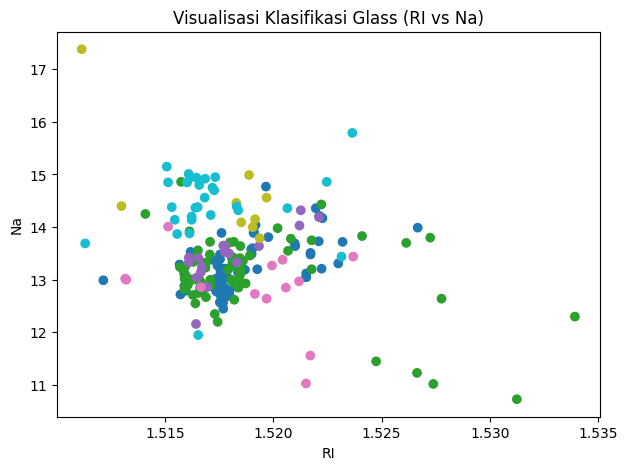

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(df['RI'], df['Na'], c=df['Type'].astype('category').cat.codes, cmap='tab10')
plt.xlabel('RI')
plt.ylabel('Na')
plt.title('Visualisasi Klasifikasi Glass (RI vs Na)')
plt.show()


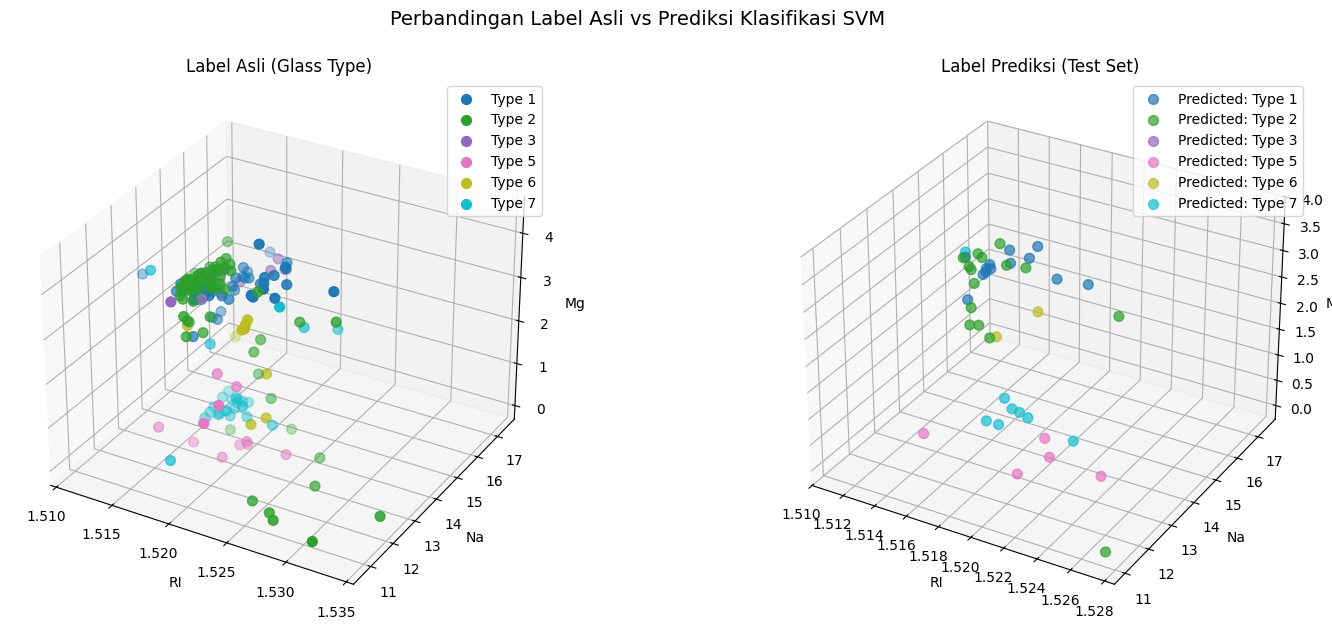

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Encode label target (kolom 'Type')
le = LabelEncoder()
df['TypeEncoded'] = le.fit_transform(df['Type'])

# Tentukan warna & label
colors = plt.cm.tab10(np.linspace(0, 1, len(le.classes_)))  # otomatis warna banyak kelas
labels = le.classes_

# Visualisasi 3D: Label Asli
fig = plt.figure(figsize=(18, 7))

ax1 = fig.add_subplot(121, projection='3d')

# Pilih 3 fitur yang mau divisualisasikan
# (misal: RI, Na, Mg — bisa kamu ganti sesuai kombinasi fitur yang ingin kamu tampilkan)
for i, label in enumerate(labels):
    subset = df[df['TypeEncoded'] == i]
    ax1.scatter(subset['RI'], subset['Na'], subset['Mg'], color=colors[i], label=f'Type {label}', s=50)

ax1.set_title('Label Asli (Glass Type)')
ax1.set_xlabel('RI')
ax1.set_ylabel('Na')
ax1.set_zlabel('Mg')
ax1.legend()

# 4️⃣ Visualisasi 3D: Label Prediksi
ax2 = fig.add_subplot(122, projection='3d')

# Buat DataFrame test hasil prediksi
test_df = X_test.copy()
test_df['True'] = y_test
test_df['Predicted'] = y_pred

# Encode label prediksi dan label asli
test_df['TrueEncoded'] = le.transform(test_df['True'])
test_df['PredEncoded'] = le.transform(test_df['Predicted'])

# Plot hasil prediksi
for i, label in enumerate(labels):
    subset = test_df[test_df['PredEncoded'] == i]
    ax2.scatter(subset['RI'], subset['Na'], subset['Mg'], color=colors[i], label=f'Predicted: Type {label}', s=50, alpha=0.7)

ax2.set_title('Label Prediksi (Test Set)')
ax2.set_xlabel('RI')
ax2.set_ylabel('Na')
ax2.set_zlabel('Mg')
ax2.legend()

plt.suptitle('Perbandingan Label Asli vs Prediksi Klasifikasi SVM', fontsize=14)
plt.show()
